In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})
from scipy import stats
from sklearn.preprocessing import StandardScaler
import scipy.io
from itertools import chain

In [2]:
import pandas as pd
from scipy.io import loadmat

data_dict = loadmat('./Vijayawada_runoff.mat')
data_dict.items
data_array =list(data_dict.values())
data=np.array(data_array[3:])
data.shape
data=data.flatten()
data.shape
df=pd.DataFrame(data)

In [3]:
df.head()

,0
0,2.817102
1,4075.688328
2,3282.789179
3,1768.535872
4,266.902092


In [4]:
df1=pd.DataFrame(pd.date_range(start='1965-01', periods=600, freq='M'))
df1.head()

,0
0,1965-01-31
1,1965-02-28
2,1965-03-31
3,1965-04-30
4,1965-05-31


In [5]:
frames=[df1,df]
daily_discharge=pd.concat(frames,axis=1)
daily_discharge.head()
daily_discharge.columns = ['Date', 'Discharge']
daily_discharge.head()


,Date,Discharge
0,1965-01-31,2.817102
1,1965-02-28,4075.688328
2,1965-03-31,3282.789179
3,1965-04-30,1768.535872
4,1965-05-31,266.902092


In [6]:
daily_discharge.shape

(600, 2)

In [7]:
daily_discharge.head()

,Date,Discharge
0,1965-01-31,2.817102
1,1965-02-28,4075.688328
2,1965-03-31,3282.789179
3,1965-04-30,1768.535872
4,1965-05-31,266.902092


In [24]:
daily_discharge.isna().sum()

Date         0
Discharge    0
dtype: int64

In [25]:
(pd.isna(daily_discharge['Gauge']) | pd.isna(daily_discharge['Water Level']) | pd.isna(daily_discharge['Discharge']) ).sum()

KeyError: 'Gauge'

In [26]:
daily_discharge.shape

(600, 2)

In [8]:
daily_discharge = daily_discharge.set_index('Date')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0413705a58>],
      dtype=object)

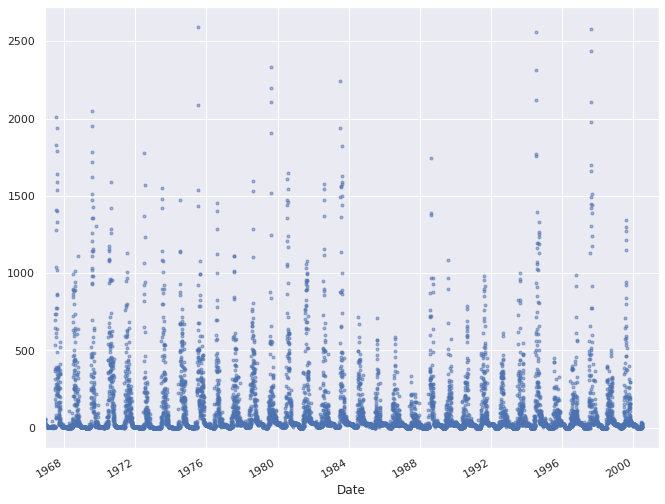

In [13]:
#xticks = pd.date_range(start="1980-01-01",end="2004-12-31", freq='Y')
#daily_discharge['Discharge'].plot(linewidth=1.0, ylim=(0,2.5), xticks=xticks);
daily_discharge.loc['1965-01':,'Discharge'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)


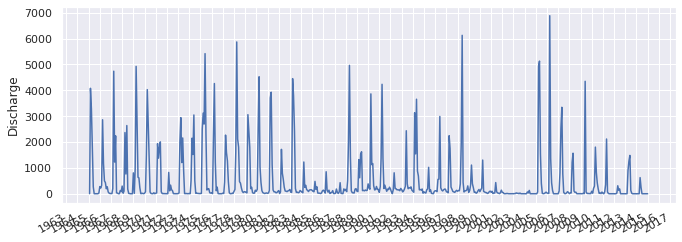

In [23]:
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots()
ax.plot(daily_discharge.loc['1965-01':'2014-12', 'Discharge'])
ax.set_ylabel('Discharge')
# Set x-axis major ticks to weekly interval, on Mondays
datemin = np.datetime64(daily_discharge.index[0], 'Y')
datemax = np.datetime64(daily_discharge.index[599], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)
ax.set_ylim(0, 2.5)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = lambda x: '$%1.2f' % x  # format the price.
ax.grid(True)
fig.autofmt_xdate()

In [11]:
daily_discharge['Year'] = daily_discharge.index.year
daily_discharge['Month'] = daily_discharge.index.month
daily_discharge.columns

Index(['Discharge', 'Year', 'Month'], dtype='object')

Text(0.5, 1, 'Discharge')

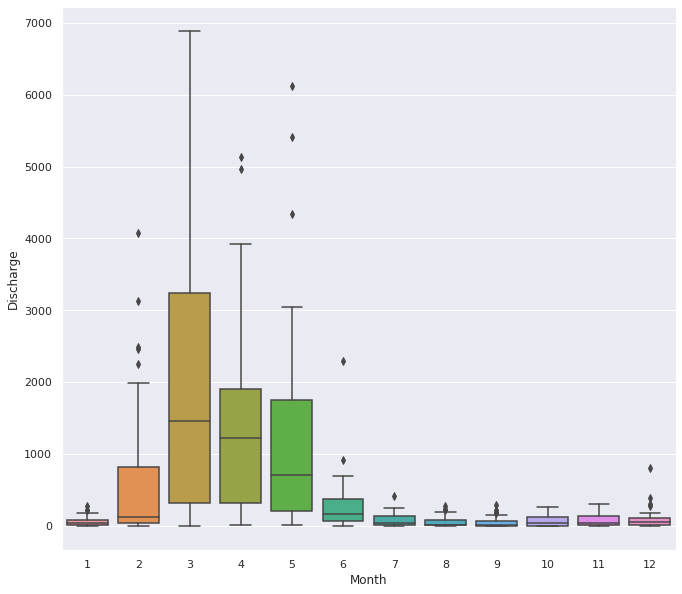

In [27]:
fig, axes = plt.subplots(1, 1, figsize=(11, 10), sharex=True)
sns.boxplot(data=daily_discharge, x='Month', y='Discharge', ax=axes)
ax.set_title('Discharge')

In [ ]:
###--- Use DataFrame's asfreq() to fill for the missing values---###
###---Check if any missing date/index---###
print(pd.date_range(start = '1980-06-03', end = '2004-07-15' ).difference(daily_discharge.index))

DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [13]:
# Specify the data columns we want to include (i.e. exclude Year, Month, Weekday Name)
data_columns = ['Discharge']
# Resample to weekly frequency, aggregating with mean
discharge_weekly_mean = daily_discharge[data_columns].resample('W').mean()
discharge_monthly_mean = daily_discharge[data_columns].resample('M').mean()
discharge_monthly_mean.head(10)

,Discharge
Date,
1965-01-31,2.817102
1965-02-28,4075.688328
1965-03-31,3282.789179
1965-04-30,1768.535872
1965-05-31,266.902092
1965-06-30,0.987321
1965-07-31,0.646173
1965-08-31,2.560681
1965-09-30,0.772760


In [42]:
discharge_weekly_mean.shape

(2606, 1)

### Resampling

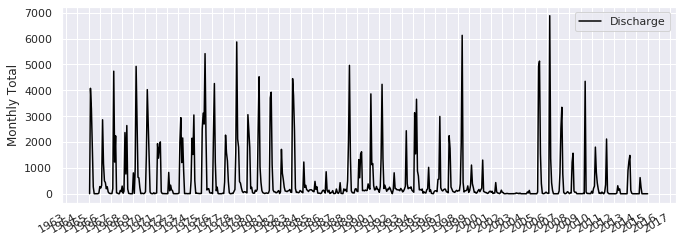

In [31]:
fig, ax = plt.subplots()
ax.plot(discharge_monthly_mean['Discharge'], color='black', label='Discharge')
#discharge_monthly['Discharge'].plot.area(ax=ax, linewidth=0)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.legend()
ax.set_ylabel('Monthly Total');
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = lambda x: '$%1.2f' % x  # format the price.
ax.grid(True)
fig.autofmt_xdate()

### Rolling windows

**Weekly and yearly rolling window**

In [14]:
discharge_7d = daily_discharge[data_columns].rolling(7, center=True).mean()
discharge_30d = daily_discharge[data_columns].rolling('30D').mean()
discharge_365d = daily_discharge[data_columns].rolling(window=365, center=True, min_periods=360).mean()

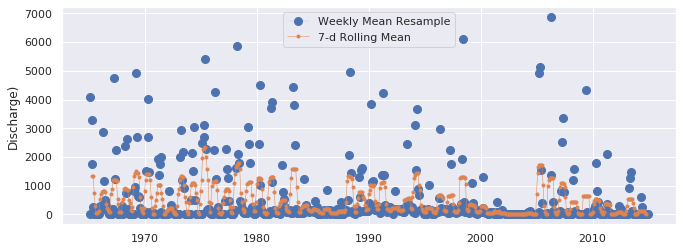

In [33]:
# Start and end of the date range to extract
start, end = '1965-01','2014-12'
# Plot daily, weekly resampled, and 7-day rolling mean time series together
fig, ax = plt.subplots()
#ax.plot(daily_discharge.loc[start:end, 'Discharge'],
#marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(discharge_weekly_mean.loc[start:end, 'Discharge'],
marker='o', markersize=8, linestyle='-', linewidth=0.1, label='Weekly Mean Resample')
ax.plot(discharge_7d.loc[start:end, 'Discharge'],
marker='.', linestyle='-', linewidth=0.5, label='7-d Rolling Mean')
ax.set_ylabel('Discharge)')
ax.legend();

/home/akshay/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


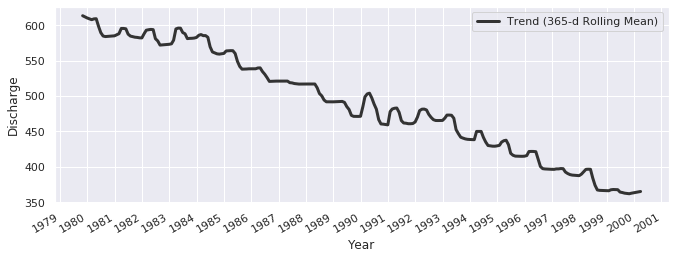

In [15]:
# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots()
#ax.plot(daily_discharge['Discharge'], marker='.', markersize=2, color='0.6',
#linestyle='None', label='Daily')
#ax.plot(discharge_7d['Discharge'], linewidth=2, label='7-d Rolling Mean')
ax.plot(discharge_365d['Discharge'], color='0.2', linewidth=3,
label='Trend (365-d Rolling Mean)')
# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Discharge')
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = lambda x: '$%1.2f' % x  # format the price.
ax.grid(True)
fig.autofmt_xdate()

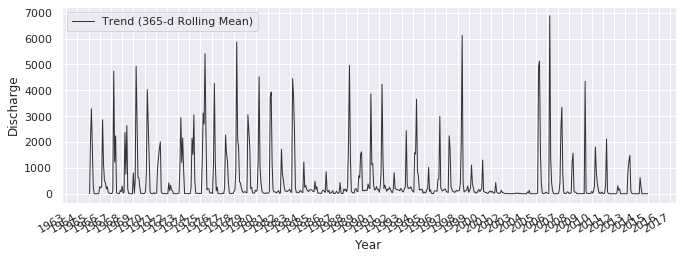

In [35]:
# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots()
#ax.plot(daily_discharge['Discharge'], marker='.', markersize=2, color='0.6',
#linestyle='None', label='Daily')
#ax.plot(discharge_7d['Discharge'], linewidth=2, label='7-d Rolling Mean')
ax.plot(discharge_30d['Discharge'], color='0.2', linewidth=1,
label='Trend (365-d Rolling Mean)')
# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Discharge')
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = lambda x: '$%1.2f' % x  # format the price.
ax.grid(True)
fig.autofmt_xdate()

In [55]:
def calc_sri(X, time_scale, distribution, start_date=None, end_date=None):
    month_cols = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    distr_dict = {'gamma': stats.gengamma, 
                  'gev': stats.genextreme,
                  'expo': stats.expon,
                  'lognorm' : stats.lognorm,
                  'weibull' : stats.dweibull,
                   'loglogistic': stats.fisk}
    
    if start_date!=None and end_date != None:
        X_scale = X.loc[start_date:end_date,'Discharge'].rolling(time_scale).mean()
    elif start_date!=None and end_date == None:
        X_scale = X.loc[start_date:,'Discharge'].rolling(time_scale).mean()
    elif start_date==None and end_date != None:
        X_scale = X.loc[:end_date,'Discharge'].rolling(time_scale).mean()
    else:
        X_scale = X['Discharge'].rolling(time_scale).mean()
    X_np = X_scale.to_numpy()
    
    df_shape = X_scale.shape
    X_np = X_np[~np.isnan(X_np)]
    res = 12 - X_np.shape[0]%12
    X_np = np.append(X_np,res*[0])
    X_np[X_np<=0] = np.finfo(float).eps
    X_np = np.reshape(X_np,(-1,12))

    sri = []
    loglikelihood = []
    for i in range(12):
        if i >= (12-res):
            x = X_np[:-1,i]
        else:
            x = X_np[:,i]
        y = np.sort(x)[::-1]
        print(y)
        if distribution=='gamma':
            a,c,loc,scale = distr_dict[distribution].fit(y)
            cdf_fitted = distr_dict[distribution].cdf(x, a, c)
            loglikelihood.append(distr_dict[distribution].logpdf(x, a, c).sum())
        elif distribution=='gev':
            a,loc,scale = distr_dict[distribution].fit(y)
            cdf_fitted = distr_dict[distribution].cdf(x, a, loc, scale)
            loglikelihood.append(distr_dict[distribution].logpdf(x, a).sum())
        elif distribution=='expo':
            loc,scale = distr_dict[distribution].fit(y)
            cdf_fitted = distr_dict[distribution].cdf(x, 1/scale)
            loglikelihood.append(distr_dict[distribution].logpdf(x, 1/scale).sum())
        elif distribution=='lognorm':
            scale_ = np.exp(np.log(x).mean())
            sigma_ = np.log(x).std()
            s,loc,scale = distr_dict[distribution].fit(y)
            cdf_fitted = distr_dict[distribution].cdf(x, s,loc,scale)
            loglikelihood.append(distr_dict[distribution].logpdf(x, s=sigma_, scale=scale_).sum())
        elif distribution=='weibull':
            c,loc,scale = distr_dict[distribution].fit(y)
            cdf_fitted = distr_dict[distribution].cdf(x, c)
            loglikelihood.append(distr_dict[distribution].logpdf(x, c).sum())
        elif distribution=='loglogistic':
            c,loc,scale = distr_dict[distribution].fit(y)
            cdf_fitted = distr_dict[distribution].cdf(x, c)
            loglikelihood.append(distr_dict[distribution].logpdf(x, c).sum())
        cdf_fitted[cdf_fitted<=0.0] = np.finfo(float).eps
        cdf = stats.norm.ppf(cdf_fitted).flatten()
        sri.append(list(cdf))
    sri = list(chain.from_iterable(sri))
    for i in range(res):
        sri.insert(0, np.nan)
    
    return sri[:df_shape[0]], np.array(loglikelihood)

In [10]:
def calculate_aic(loglike, num_params):
    aic = -loglike + 2 * num_params
    return aic

In [12]:
discharge_monthly_sum = daily_discharge[['Discharge']]
#discharge_monthly_sum = (daily_discharge[['Discharge']] - daily_discharge[['Discharge']].min()) / (daily_discharge[['Discharge']].max() - daily_discharge[['Discharge']].min())
distr = ['gamma','gev','expo','lognorm','weibull', 'loglogistic']
num_params = [2,1,1,1,1,1]
aic_dict = {}
for d,n in zip(distr,num_params):
    sri_df_3months, logl = calc_sri(discharge_monthly_sum, time_scale=12, 
                                    distribution=d, start_date="1965-01")
    cumu_logl = np.mean(logl[np.isinf(logl)==False])
    aic_dict[d] = calculate_aic(cumu_logl, n)
print(aic_dict)

{'gamma': 357642150.58666813, 'gev': 450.84461280900643, 'expo': 24192.930236089447, 'lognorm': 362.7132643642628, 'weibull': 3464963.5967330984, 'loglogistic': 1783.298080044274}


In [56]:
#discharge_monthly_sum = daily_discharge[['Discharge']].resample('M').sum()
sri_np, logl = calc_sri(discharge_monthly_sum, time_scale=12, distribution='lognorm')
df_sri = pd.DataFrame(np.ravel(sri_np)[0:discharge_monthly_sum.shape[0]], columns=['SRI'])

[1387.40506725 1078.09973178 1017.06686938  950.96254327  889.67273062
  843.80536791  826.7806217   825.51267797  811.17354241  808.8411285
  791.56228426  772.66304212  747.78677989  740.68579601  736.64972445
  735.76067294  678.72016264  678.4953983   653.12444022  649.73152009
  647.62335912  599.57180261  574.48253172  526.04827919  517.98756723
  505.79152057  446.10204333  421.64150577  383.80929891  381.1631877
  339.844803    324.47337937  316.40368755  255.66339286  237.1693148
  227.03590731  217.79748748  197.05108891  183.8710104   157.9843309
  130.72883018  127.60441409  120.32989735  105.58657616   79.356006
   72.02951291   54.39473684   19.82556067    8.82011162    6.02969805]
[1386.76630958 1068.23298922 1018.27060955  950.9004329   887.94992626
  849.01944832  827.16243402  826.74853581  821.548317    811.37133698
  790.16999754  770.62131921  748.79426927  743.14729499  728.4724749
  719.77043188  689.09830021  679.03605791  657.44483804  650.42675721
  641.443277

In [21]:
#frames=[df1,df_sri]
#df_sri=pd.concat(frames,axis=1)
#df_sri.set_index('Date')
#df_sri.columns = ['Date', 'Discharge']
df_sri['SRI'] = pd.to_numeric(df_sri['SRI'])
df_sri.dtypes

SRI    float64
dtype: object

In [22]:
df_sri = df_sri.set_index(daily_discharge.index)
df_sri.head()
daily_discharge['SRI'] = df_sri['SRI']
#daily_discharge.head()

In [23]:
#daily_discharge['SRI'] = df_sri['SRI']
daily_discharge.tail()

,Discharge,SRI
Date,,
2014-08-31,0.0,0.121467
2014-09-30,0.0,-0.108872
2014-10-31,0.0,-0.451742
2014-11-30,0.0,0.091457
2014-12-31,0.0,-0.414606


In [321]:
daily_discharge.to_csv('op_2.csv',index=True)

No handles with labels found to put in legend.


"\nax2 = fig.add_subplot(212)\nax2.plot(spi[11])\n#prob = stats.probplot(xt, dist=stats.norm, plot=ax2)\nax2.set_title('Probplot after Box-Cox transformation')\n"

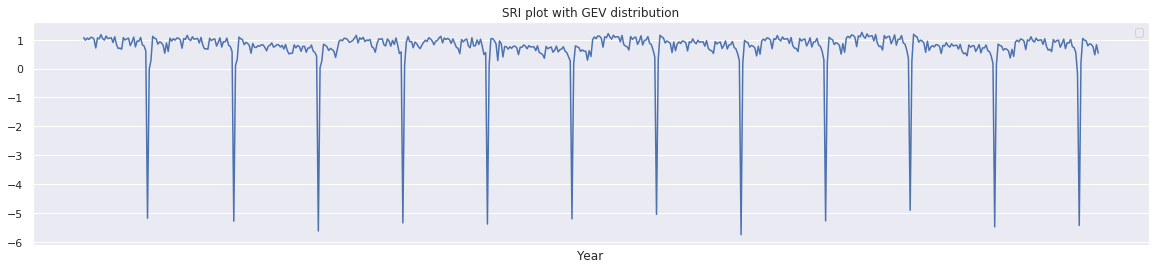

In [57]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(211)
#np_ = df_sri['SRI'].to_numpy()
#np_[np_<-2.5] = -2.0
ax1.plot(sri_np)
#prob = stats.probplot(pdf_fitted[0], dist=stats.norm, plot=ax1)
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.xaxis.set_minor_locator(mdates.MonthLocator())
ax1.legend()
ax1.set_xlabel('Year')
ax1.set_title('SRI plot with GEV distribution')
ax1.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax1.format_ydata = lambda x: '$%1.2f' % x  # format the price.
ax1.grid(True)
fig.autofmt_xdate()
'''
ax2 = fig.add_subplot(212)
ax2.plot(spi[11])
#prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')
'''

In [ ]:
import geopandas as gpd

In [ ]:
discharge_loc = pd.read_csv("./data/KRB_Discharge_Stations/Discharge loctions Krishna Basin.csv")

In [ ]:
discharge_loc.head()

,Discharge location,latitude,longitude
0,Bawapuram,15.802,77.850
1,cholachguda,15.879,75.710
2,Halia,16.810,79.913
3,Hoovinahole,13.891,76.815
4,karad,17.276,74.200


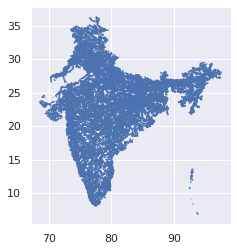

In [ ]:
'''
gdf = geopandas.GeoDataFrame(
    discharge_loc, geometry=geopandas.points_from_xy(discharge_loc.longitude, discharge_loc.latitude))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = country[world.country == 'Asia'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()
'''
fp = "./waterways/waterways.shp"
map_df = gpd.read_file(fp)

map_df.plot()

In [ ]:
def SPI(da_precip, distribution = 'gamma', periodicity = 'monthly',\
        scales = 6, data_start_year = '1965', data_end_year = '1965',\
        calibration_start_year = '1965',\
        calibration_end_year = '2015'):
    """Calculate SPI from precipitation
    This function uses the SPI calculation from the climate indices package
    Args:
        da_precip (Xarray DataArray): A dataArray of precipitation
        distribution (str): The distribution used to fit the data. Default is
            'gamma'. To use a Pearson Type III distribution, enter 'pearson'
        periodicity (str): Either 'monthly' or 'daily'
        scales (int): The timescales on which the index is computed, either 6 or 12.
            Default is 6.
        data_start_year: Year to start computing  SPI - Default is first year in the data
        data_end_year: Year to stop computing  SPI - Default is first year in the data
        calibration_start_year: Start year for the calibration - Defauls is first year in the data
        calibration_end_year: End year for the calibration - Default is to set a 30-year  period,
            or the full dataset if shorter than 30 years
    Returns:
        ds_spi (Xarray DataArray): SPI index  DataArray
        info (dict): Dictionary containing relevant information about the calib period
    """

    #Perform some checks
    assert scales==6 or scales==12, 'Valid entries for timescales field should be 6 or 12'
    assert distribution == 'gamma' or distribution == 'pearson', "Valid entries for distribution field should be 'gamma' or pearson'"
    assert periodicity == 'monthly' or periodicity == 'daily', "Valid entries for periodicity field should be 'monthly' or 'daily'"

    if distribution == 'gamma':
        dist = indices.Distribution.gamma
    elif distribution == 'pearson':
        dist = indices.Distribution.pearson

    if periodicity == 'monthly':
        period = compute.Periodicity.monthly
    if periodicity == 'daily':
        period = compute.Periodicity.daily

    if data_start_year == 'beginning':
        data_start_year = int(np.min(da_precip.time.dt.year))
    elif data_start_year not in da_precip.time.dt.year.values:
        print('Start year not in dataset, using first available year')
        data_start_year = int(np.min(da_precip.time.dt.year))

    if data_end_year == 'end':
        data_end_year = int(np.max(da_precip.time.dt.year))
    elif data_end_year not in da_precip.time.dt.year.values:
        print('Start year not in dataset, using first available year')
        data_end_year = int(np.max(da_precip.time.dt.year))

    if calibration_start_year == 'beginning':
        calibration_start_year = int(np.min(da_precip.time.dt.year))
    elif calibration_start_year not in da_precip.time.dt.year.values:
        print('Calibration start year not in dataset, using first available year')
        calibration_start_year = int(np.min(da_precip.time.dt.year))

    if calibration_end_year == 'end':
        calibration_end_year = calibration_start_year + 29
        if calibration_end_year not in da_precip.time.dt.year.values:
            calibration_end_year = int(np.max(da_precip.time.dt.year))
    elif calibration_end_year not in da_precip.time.dt.year.values:
        print('Calibration end year not in dataset, using 30yr window or end of dataset')
        calibration_end_year = calibration_start_year + 29
        if calibration_end_year not in da_precip.time.dt.year.values:
            calibration_end_year = int(np.max(da_precip.time.dt.year))
    
    # Load the data
    if len(da_precip.dims) == 4: #Deal with ECMWF data
        da_precip = da_precip[:,0,:,:]
        da_precip.squeeze()
    da_precip.load()
    #Groupby
    if 'lat' in da_precip.coords:
        da_precip_groupby = da_precip.stack(point=('lat', 'lon')).groupby('point')
    elif 'latitude' in da_precip.coords:
        da_precip_groupby = da_precip.stack(point=('latitude', 'longitude')).groupby('point')
    elif 'Y' in da_precip.coords:
        da_precip_groupby = da_precip.stack(point=('Y', 'X')).groupby('point')
    else:
        raise KeyError('latitude not found')

    #Perform calculation
    da_spi = xr.apply_ufunc(indices.spi,
                        da_precip_groupby,
                        scales,
                        dist,
                        data_start_year,
                        calibration_start_year,
                        calibration_end_year,
                        period)
    #Unstack
    da_spi = da_spi.unstack('point')
    #cut
    t_start  = str(data_start_year)+'-01-01T00:00:00.000000000'
    t_end  = str(data_end_year)+'-12-01T00:00:00.000000000'
    da_spi_cut = da_spi.sel(time=slice(t_start,t_end))
    ds_spi=da_spi_cut.to_dataset(name='spi') #convert to xarrayDataset

    info = {'index':'SPI',
            'calibration_start': calibration_start_year,
            'calibration_end':  calibration_end_year,
            'distribution': distribution,
            'periodicity': periodicity,
            'timescales': scales}

    return ds_spi, info